In [2]:
# Download YOLOv7 repository and install requirements

%cd /content
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!pip install -r requirements.txt

/content
Cloning into 'yolov7'...
remote: Enumerating objects: 1094, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1094 (delta 0), reused 1 (delta 0), pack-reused 1091
Receiving objects: 100% (1094/1094), 69.85 MiB | 36.42 MiB/s, done.
Resolving deltas: 100% (522/522), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 28.3 MB/s 


In [3]:
!sed -n -e 1557p -e 1404p /content/yolov7/utils/loss.py

            from_which_layer = from_which_layer[fg_mask_inboxes]
            from_which_layer = from_which_layer[fg_mask_inboxes]


第1557和第1404要修改 不然會Error

In [4]:
# 注意跳脫自字元
!sed -i '1557s/from_which_layer\[fg_mask_inboxes\]/from_which_layer.to(fg_mask_inboxes.device)\[fg_mask_inboxes\]/' /content/yolov7/utils/loss.py
!sed -i '1404s/from_which_layer\[fg_mask_inboxes\]/from_which_layer.to(fg_mask_inboxes.device)\[fg_mask_inboxes\]/' /content/yolov7/utils/loss.py

!sed -n -e 1557p -e 1404p /content/yolov7/utils/loss.py

            from_which_layer = from_which_layer.to(fg_mask_inboxes.device)[fg_mask_inboxes]
            from_which_layer = from_which_layer.to(fg_mask_inboxes.device)[fg_mask_inboxes]


In [ ]:
import os
%cd /content/yolov7

# 無人機dataset
!pip install -q --upgrade gdown
!gdown --id '1qZDycTDs_AVdfA5_BQBE8_Hl-5P6DfJ_'
!unzip -q mydataset.zip
os.remove("mydataset.zip")

/content/yolov7
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qZDycTDs_AVdfA5_BQBE8_Hl-5P6DfJ_
To: /content/yolov7/mydataset.zip
100% 4.43G/4.43G [00:44<00:00, 98.7MB/s]


In [ ]:
yaml_file = "/content/yolov7/mydataset/data.yaml"
if os.path.exists(yaml_file) == False:
  f= open(yaml_file,"w+")
  f.write("train: /content/yolov7/mydataset/train/images\n") # train資料位置
  f.write("val: /content/yolov7/mydataset/val/images\n")
  f.write("nc: 4\n") # 修改:有幾個類別
  f.write("\n")
  # 自己dataset的類別
  f.write("names: ['car', 'hov', 'person', 'motorcycle']\n") # 修改
  f.close()


把Ancchor box修改為自己Dataset分群求出來的尺寸

In [5]:
# 原本作者Github預設的Anchor box尺寸
!sed -n -e 8p -e 9p -e 10p -e 11p cfg/training/yolov7-w6.yaml

  - [ 19,27,  44,40,  38,94 ]  # P3/8
  - [ 96,68,  86,152,  180,137 ]  # P4/16
  - [ 140,301,  303,264,  238,542 ]  # P5/32
  - [ 436,615,  739,380,  925,792 ]  # P6/64


In [6]:
!sed -i '8s/19,27,  44,40,  38,94/6,21,  13,14,  11,23/' cfg/training/yolov7-w6.yaml
!sed -i '9s/96,68,  86,152,  180,137/18,23,  13,34,  30,26/' cfg/training/yolov7-w6.yaml
!sed -i '10s/140,301,  303,264,  238,542/22,37,  17,53,  22,71/' cfg/training/yolov7-w6.yaml
!sed -i '11s/436,615,  739,380,  925,792/40,39,  37,67,  77,91/' cfg/training/yolov7-w6.yaml

!sed -n -e 8p -e 9p -e 10p -e 11p cfg/training/yolov7-w6.yaml

  - [ 6,21,  13,14,  11,23 ]  # P3/8
  - [ 18,23,  13,34,  30,26 ]  # P4/16
  - [ 22,37,  17,53,  22,71 ]  # P5/32
  - [ 40,39,  37,67,  77,91 ]  # P6/64


In [ ]:
%cd /content/yolov7

/content/yolov7


In [ ]:
!pwd

/content/yolov7


### 使用 wandb 記錄訓練過程
- 先官網登入：https://wandb.ai/site 
- 右上方頭像 -> settings -> 複製 API keys -> 填入下方輸入處

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.8 MB/s 
     |████████████████████████████████| 168 kB 88.3 MB/s 
     |████████████████████████████████| 182 kB 95.4 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 168 kB 99.6 MB/s 
     |████████████████████████████████| 166 kB 100.6 MB/s 
     |████████████████████████████████| 166 kB 103.2 MB/s 
     |████████████████████████████████| 162 kB 105.9 MB/s 
     |████████████████████████████████| 162 kB 100.8 MB/s 
     |████████████████████████████████| 158 kB 106.5 MB/s 
     |████████████████████████████████| 157 kB 93.8 MB/s 
     |████████████████████████████████| 157 kB 110.6 MB/s 
     |████████████████████████████████| 157 kB 100.8 MB/s 
     |████████████████████████████████| 157 kB 64.0 MB/s 
     |████████████████████████████████| 157 kB 101.4 MB/s 
     |████████████████████

In [ ]:
import wandb
# Logging
id = wandb.util.generate_id()
wandb_run = wandb.init()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
id 

'3qpcqhm2'

下載前一階段在VisDrone訓練6類別的權重檔準備接類訓練

In [ ]:
!gdown --id '1YqzVkg4wMXuc6HjUFmuu5xi6080LQKam' --output data.zip
!unzip -q data.zip
os.remove("data.zip")

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YqzVkg4wMXuc6HjUFmuu5xi6080LQKam
To: /content/yolov7/data.zip
100% 151M/151M [00:01<00:00, 78.8MB/s]


In [ ]:
!python train_aux.py --epochs 80 \
--batch-size 20 \
--data mydataset/data.yaml \
--img 1280 1280 \
--device 0 \
--cfg cfg/training/yolov7-w6.yaml \
--weights 'best.pt' \
--hyp data/hyp.scratch.custom.yaml

YOLOR 🚀 v0.1-104-g941b94c torch 1.13.0+cu116 CUDA:0 (A100-SXM4-40GB, 40536.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=20, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7-w6.yaml', data='mydataset/data.yaml', device='0', entity=None, epochs=80, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[1280, 1280], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=20, upload_dataset=False, weights='best.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2022-12-10 12:15:21.072752: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numeric

都跑完時到側邊欄下載權重檔

F1 and Precision Recall Curve

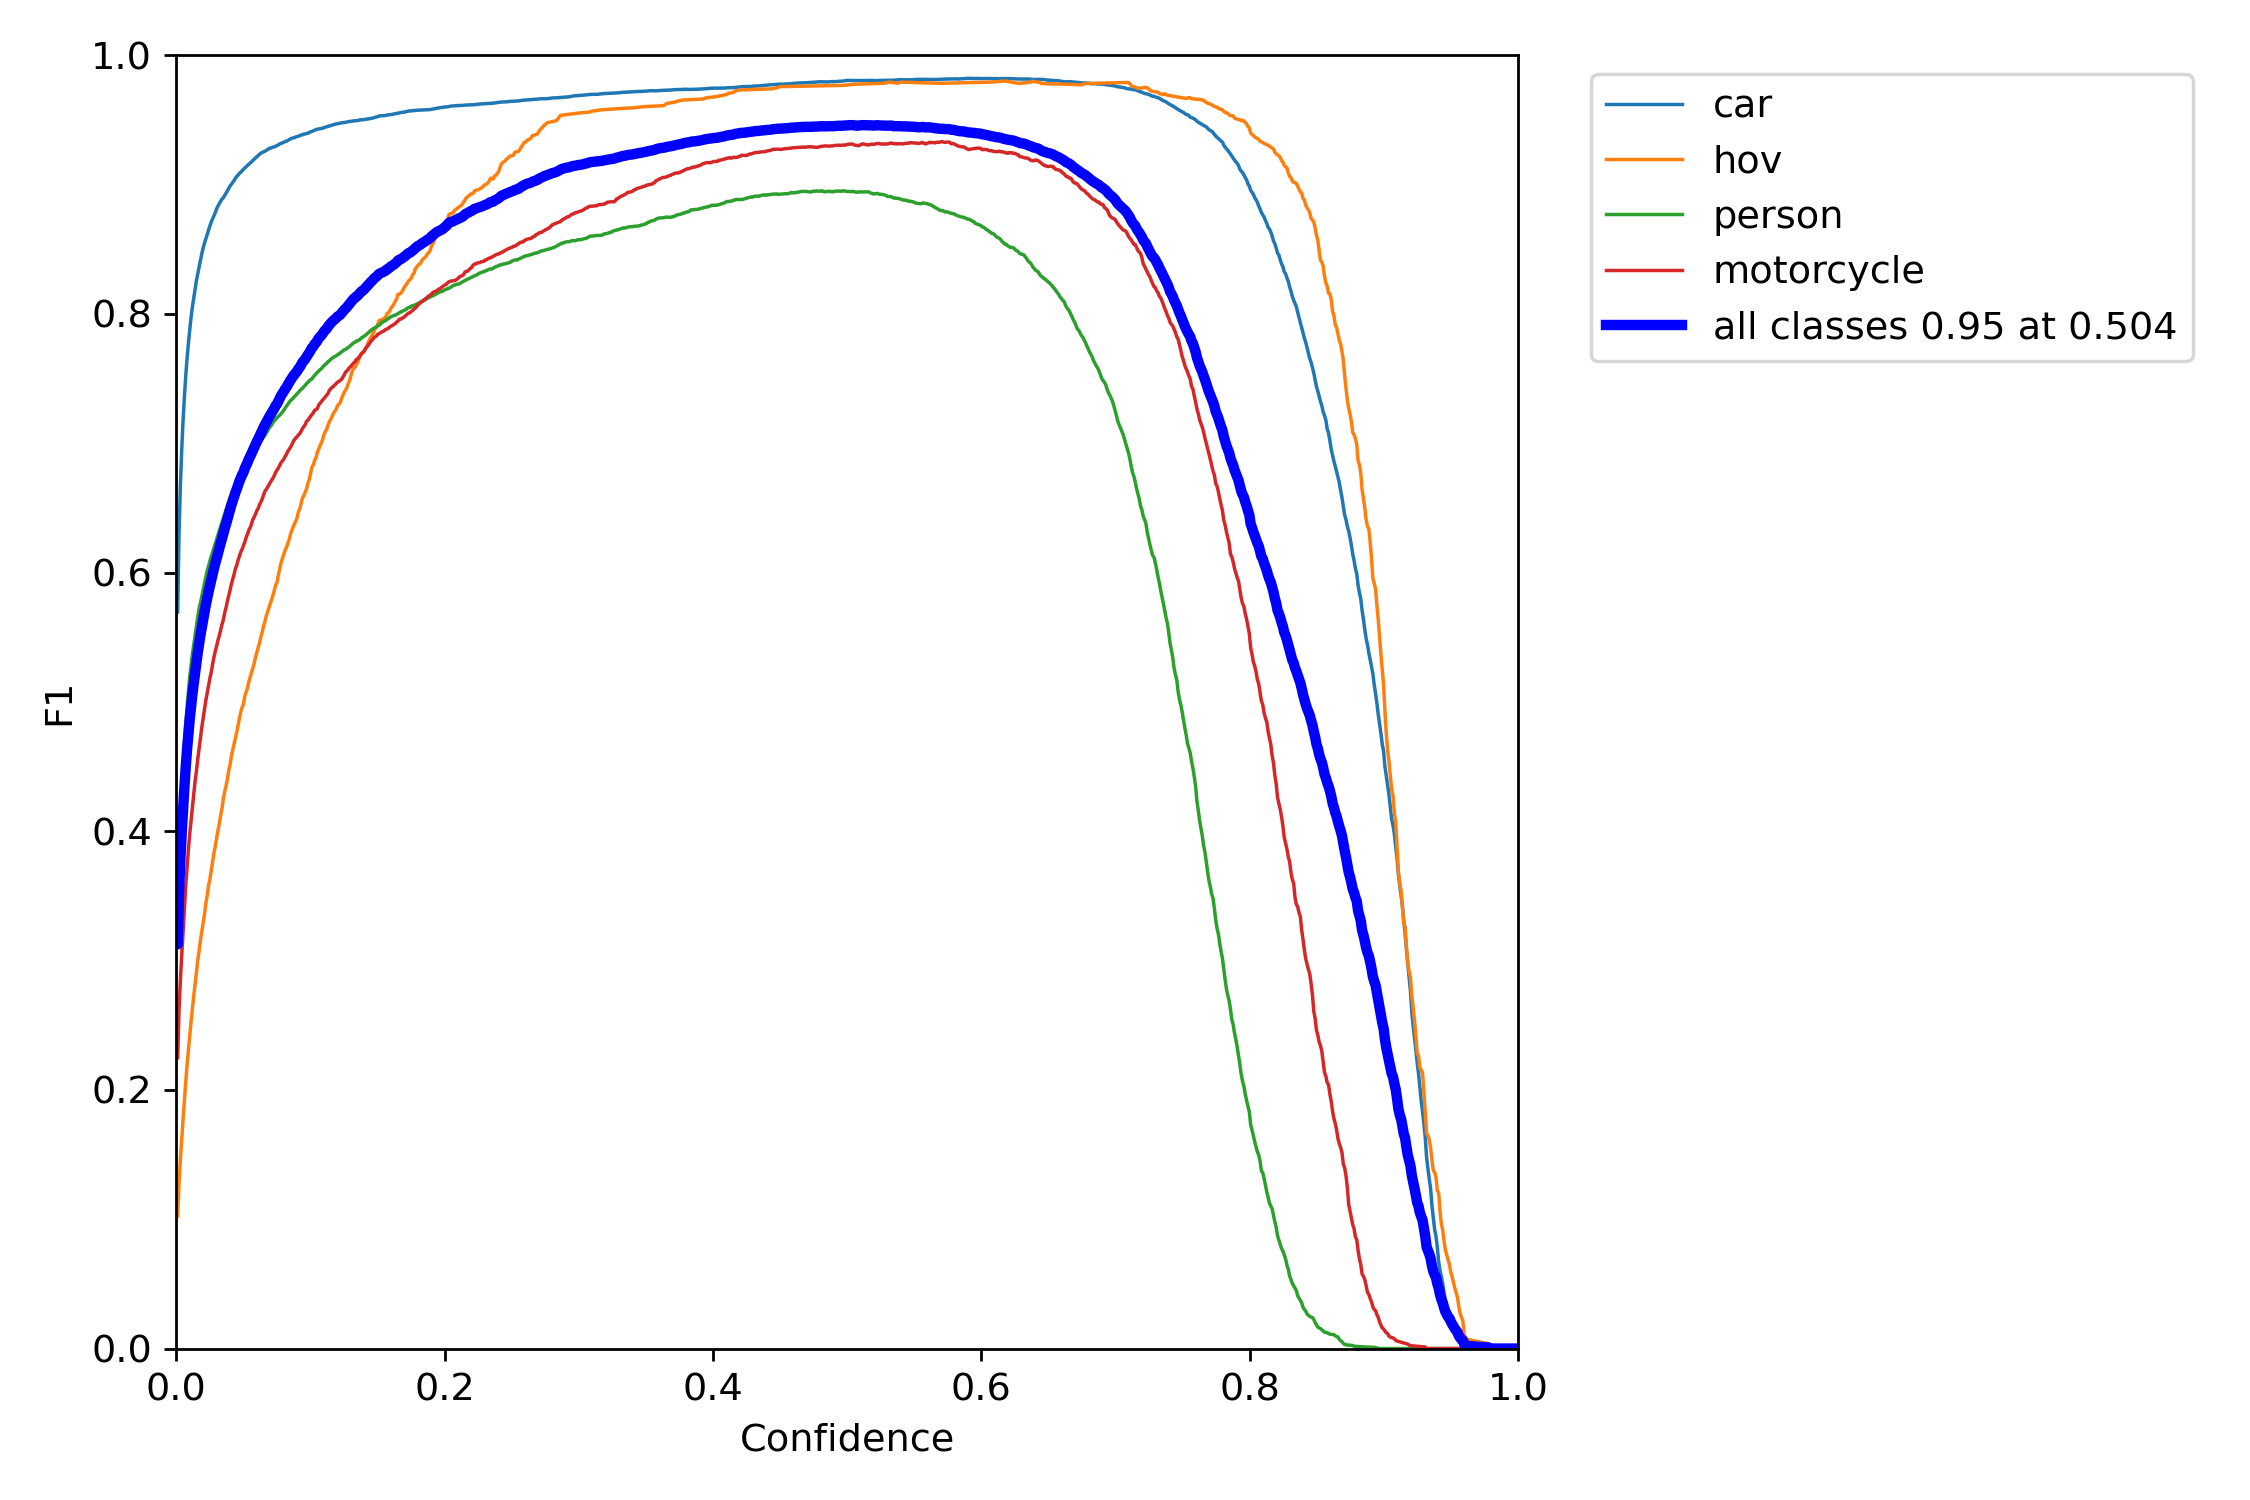

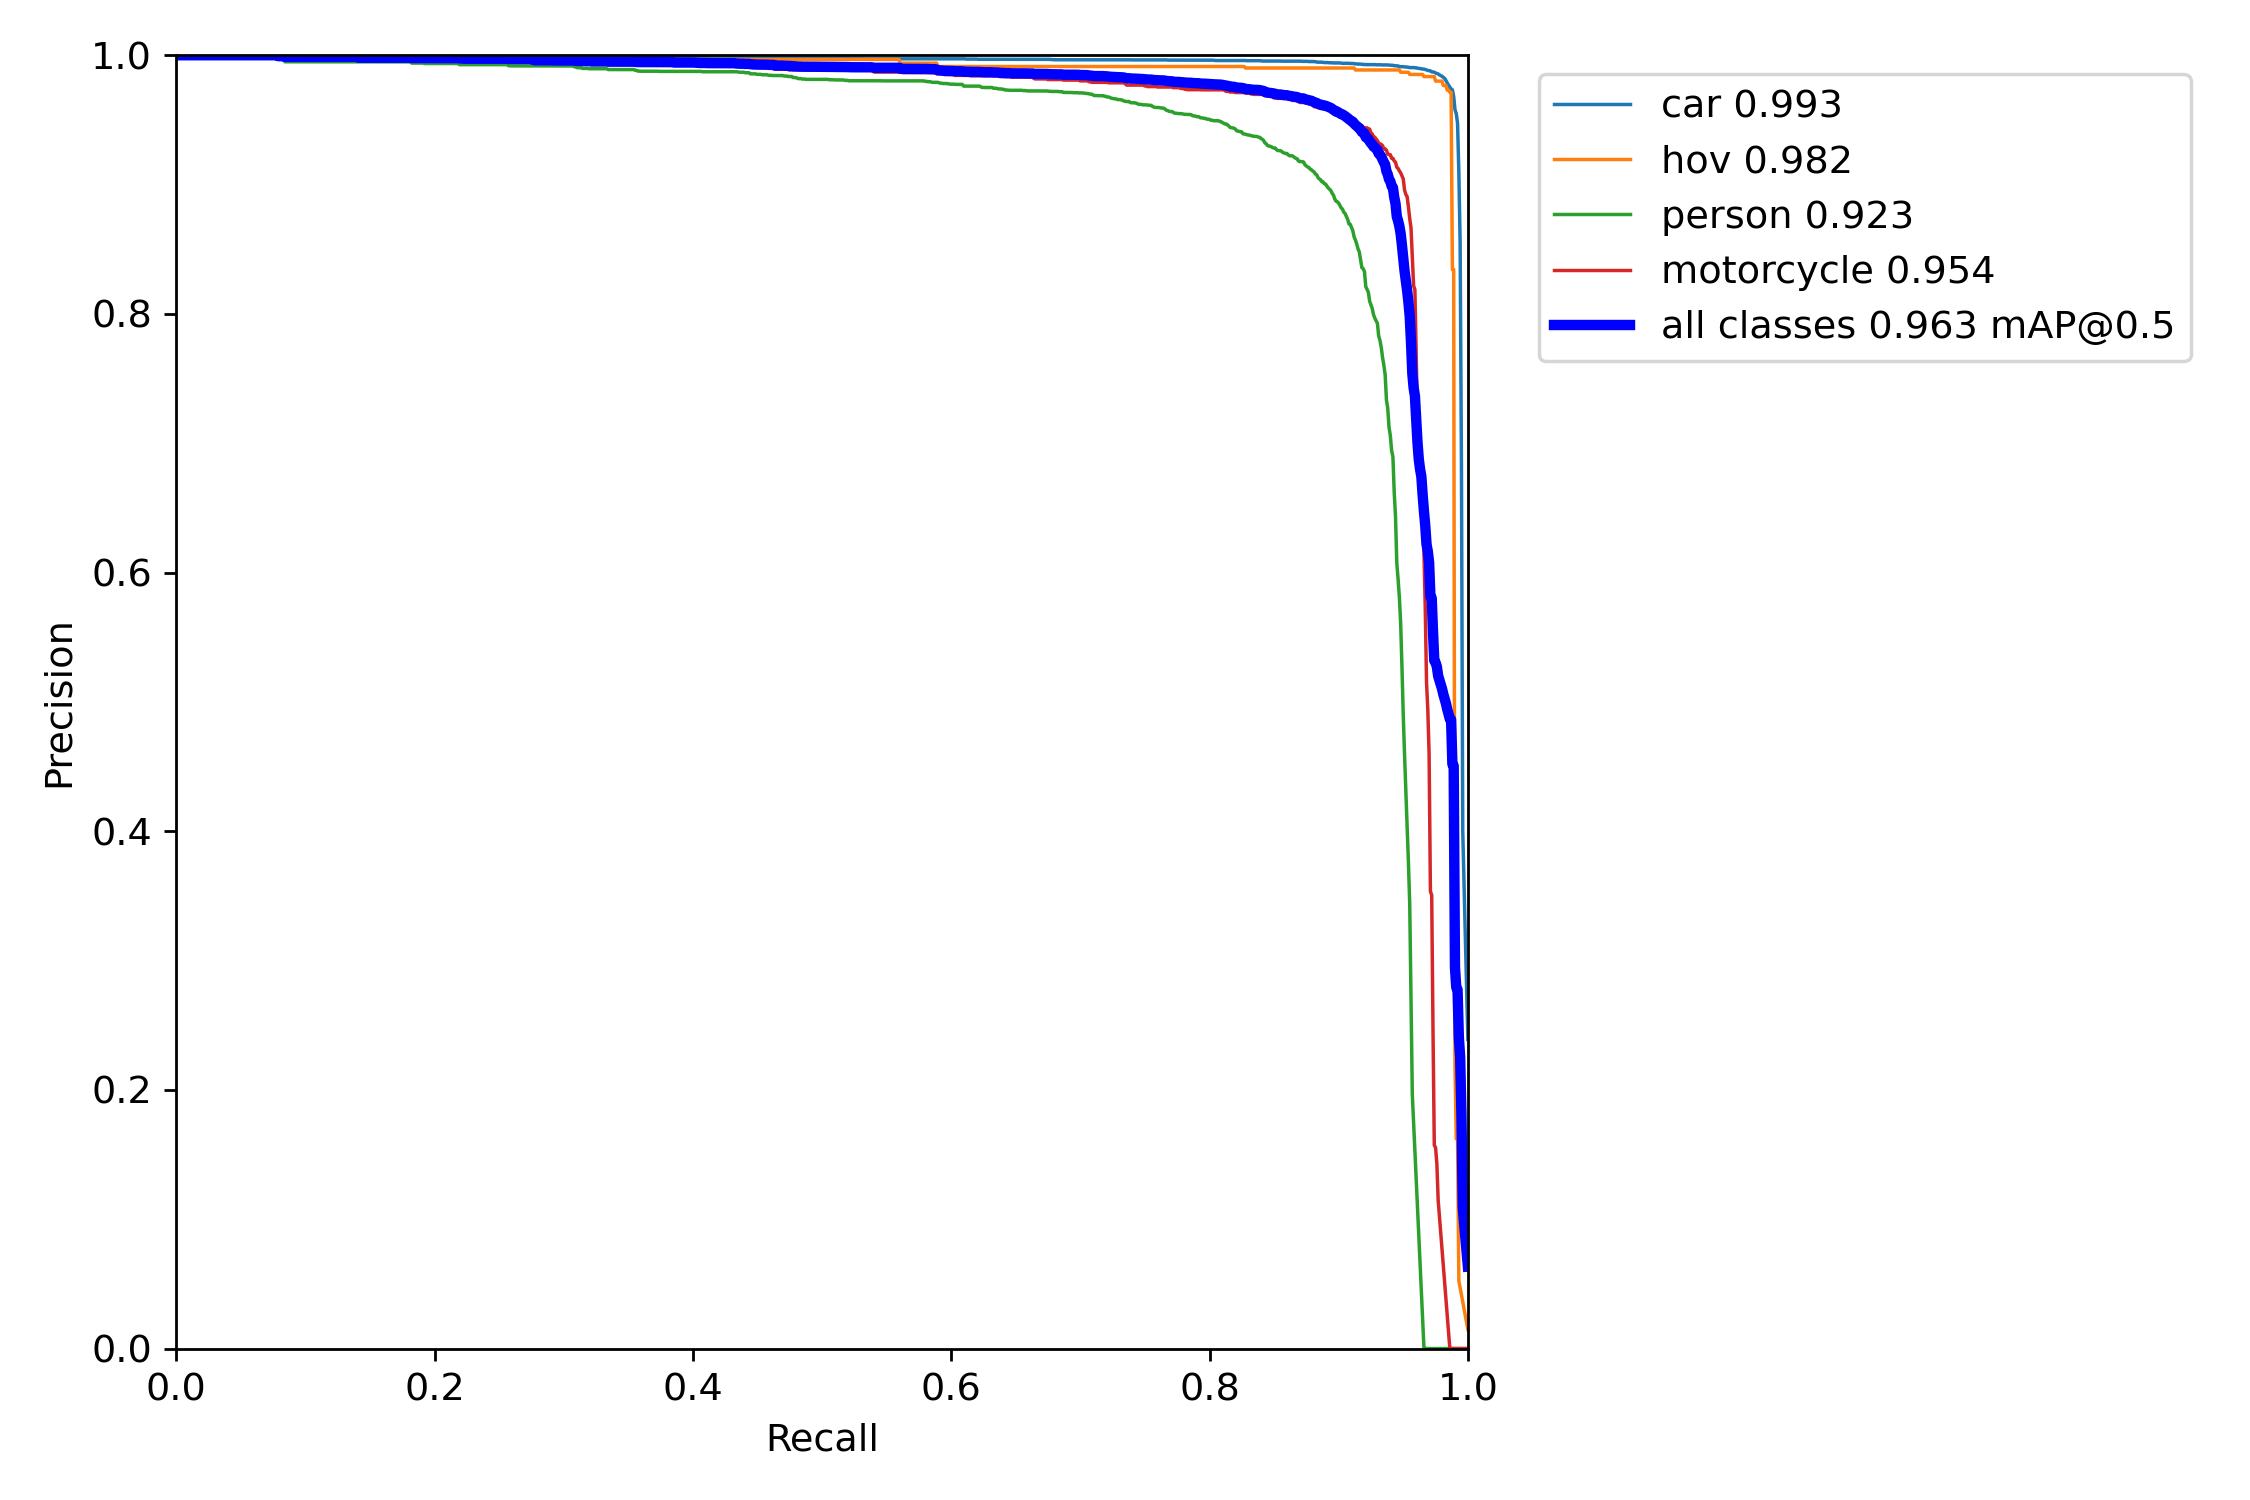

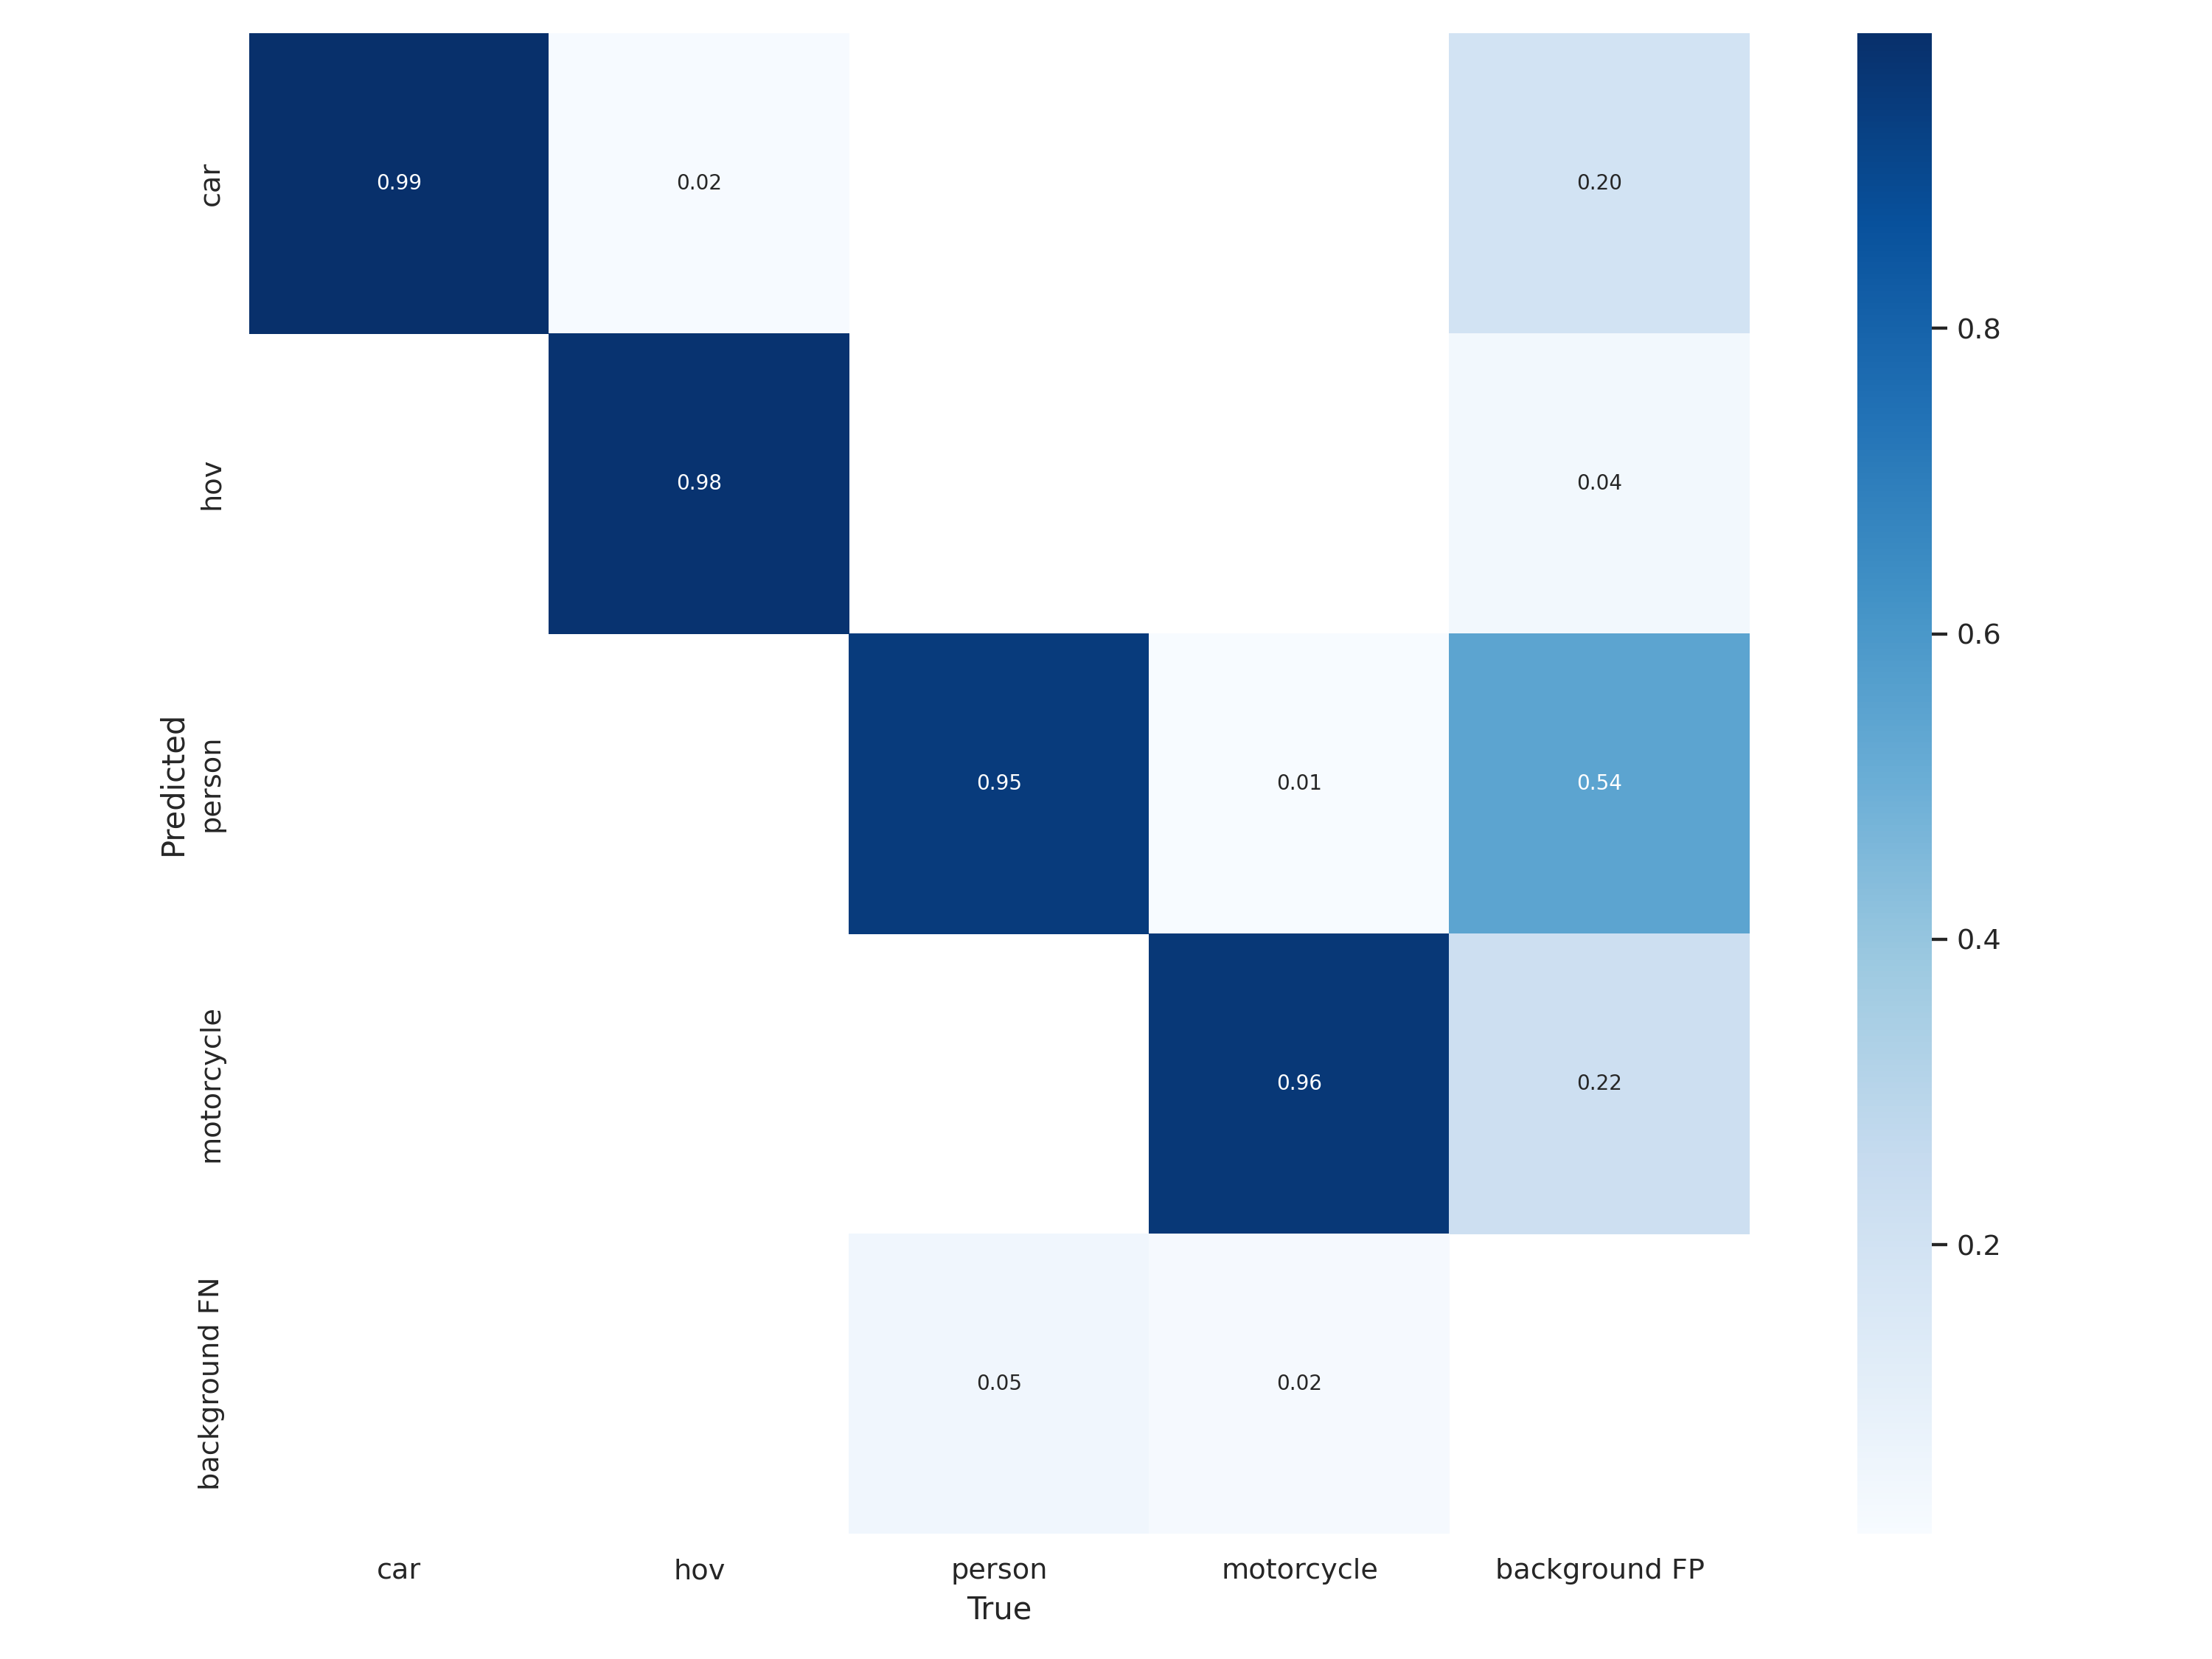

In [ ]:
from IPython.display import Image

chosen_folder= '/content/yolov7/runs/train/exp/'
display(Image(chosen_folder + "F1_curve.png", width=800, height=400))
display(Image(chosen_folder + "PR_curve.png", width=800, height=400))
display(Image(chosen_folder + "confusion_matrix.png", width=720, height=540))

In [ ]:
!tar zcvf /content/2_best.zip /content/yolov7/runs/train/exp/weights/best.pt

tar: Removing leading `/' from member names
/content/yolov7/runs/train/exp/weights/best.pt
